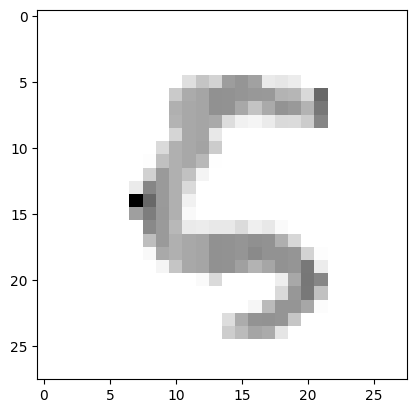

C:\Users\penta\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8673 - loss: 0.4683
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9641 - loss: 0.1163
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9775 - loss: 0.0727
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9619 - loss: 0.1150
Validation loss: 0.09943103045225143
Validation accuracy: 0.9668999910354614
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Label: 8
Prediction: 8


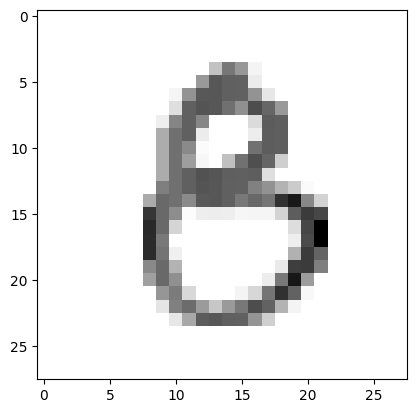

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Label: 0
Prediction: 0


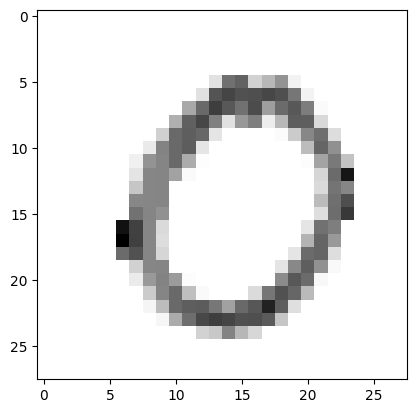

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Function to draw an image
def draw(n):
    plt.imshow(n, cmap=plt.cm.binary)
    plt.show()

# Example of drawing an image from training data
draw(x_train[2000])

# Build a Sequential model
model = tf.keras.models.Sequential()

# Add layers to the model
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # Flatten 28x28 images to a 1D array
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # Dense layer with 128 neurons and ReLU activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # Dense layer with 128 neurons and ReLU activation
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons for 10 classes and softmax activation

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=3)

# Evaluate on test data
val_loss, val_acc = model.evaluate(x_test, y_test)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

# Make predictions
predictions = model.predict(x_test)
print('Label:', y_test[800])
print('Prediction:', np.argmax(predictions[800]))
draw(x_test[800])

# Save the model
model.save('epic_num_reader.h5')

# Load the model with custom_objects for softmax_v2
new_model = tf.keras.models.load_model('epic_num_reader.h5', custom_objects={'softmax_v2': tf.nn.softmax})

# Make predictions with the loaded model
predictions_new = new_model.predict(x_test)
print('Label:', y_test[101])
print('Prediction:', np.argmax(predictions_new[101]))
draw(x_test[101])
